<a href="https://colab.research.google.com/github/Antonego64/minitarea3/blob/master/minitarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 3: Uso de Atropy y Pandas con bases de datos.

**Objetivos:**

1. Abrir y graficar de forma clara un archivo FITS.
2. Trabajar con Pandas para el manejo de una gran base de datos.
3. Conocer sobre los exoplanetas que se han descubierto.


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.


##Astropy y FITS

##1. Abrir un FITS con Astropy y sacar información de su header

La primera parte de esta minitarea consiste en descargar un nuevo archivo `FITS` desconocido. Usando lo que aprendimos en clases, debemos sacar información importante de su header.

Para comenzar, debes descargar el archivo `FITS`  dado y luego, abrirlo usando el módulo `fits` de  `Astropy` para guardalo en una variable llamada hdu:

In [0]:
import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy.utils.data import download_file
import numpy as np

archivo = download_file("https://github.com/astrodatos/Clase3/raw/master/lsc1m005-kb69-20160621-0111-e91.fits.fz", cache=True )
hdu = fits.open(archivo) #aquí se abre el archivo fits guardado en la variable archivo, que posteriormente se guarda en la variable hdu

Como comentamos en clases, no existe un estandar universal sobre los header provenientes de distintos telescopios. **En este caso particular, la información del fit no vive en `hdu[0]`, sino que en `hdu[1]`.**

In [35]:
print(hdu.info()) #printeamos su info, donde notamos que hay dos matrices en hdu[1] y hdu[3]

Filename: /root/.astropy/cache/download/py3/a01c803c4997037bcc23c9d47d4803ac
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 CompImageHDU    264   (2028, 2028)   float32   
  2  CAT           1 BinTableHDU     59   51R x 24C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D]   
  3  BPM           1 CompImageHDU     10   (2028, 2028)   uint8   
None


Ahora, debes inspeccionar el header. Llámalo (sin un print, porque sale hacia el lado) para ver que forma tiene el diccionario: sus llaves (keys) y valores asignados. 

In [36]:
# Invocar el header
header = hdu[1].header #lo inspeccionamos
header #no tenemos que printearlo

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2028 / width of table in bytes                        
NAXIS2  =                 2028 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
EXTNAME = 'SCI     '                                                            
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'lsc     '        

Debes identificar las llaves que contengan información acerca de: 
1. objeto astronómico que se observó.
2. qué filtro se usó.
3. la fecha de la observación.
4. desde qué observatorio. 

Para completar los siguientes print,  primero debes crear una variable para cada uno de los datos que necesitamos y guardar la información directamente desde el header, habiendo ya identificado el `key` del diccionario donde vive cada información.

In [0]:
# Crea 4 variables para guardar la información del header requerida. Recuerda que no sirve leer a ojo el valor y escribirlo.
# Debe ser asignado usando los beneficios de ser un array, de la forma genérica: header["key"]
objeto=header["OBJECT"] #variable que sirve para guardar la info del objeto astronómico que se observó
filtro=header["FILTER"] #variable que sirve para guardar la info del filtro que se usó
fecha=header["DATE"]    #variable que sirve para guardar la info de la fecha de observación
observatorio=header["SITE"]    #variable que sirve para guardar la info del observatorio 

In [38]:
print("Se observó el siguiente objeto astronómico:",objeto)
print("Se utilizó el filtro:",filtro)
print("La fecha es:",fecha)
print("Se observó desde el observatorio:",observatorio)

Se observó el siguiente objeto astronómico: M84
Se utilizó el filtro: V
La fecha es: 2016-06-22
Se observó desde el observatorio: LCOGT node at Cerro Tololo Inter-American Observatory


**Nota: no hay mucho que decir de esto, solo hay que usar las mágicas propiedades del header**

##2. Mostrar la imagen con imshow

La segunda parte de esta actividad consiste en mostrar la imagen con imshow y modificarla para que se vea más bonita. 

Primero, debes asignar en la variable `imagen` la compenente del header que contiene la matriz que forma la imagen astronómica. Recuerda que en este fits específico, el header y la imagen viven en `hdu[1]`.

In [39]:
imagen = hdu[1].data
print("Las dimensiones de la matriz imagen son: ",imagen.shape) #es opcional, pero sirve para hacerle "zoom" a un ploteo que haremos después
#aunque igual se puede saber esto viendo los valores de NAXIS1 y NAXIS2 respectivamente

Las dimensiones de la matriz imagen son:  (2028, 2028)


Vamos a importar un módulo de `matplotlib` que nos permitirá cambiar la escala de colores de la imagen, como por ejemplo, a una logaritmica. 

Ahora, debes completar el siguiente bloque de código para mostrar la imagen que viene en este fit.

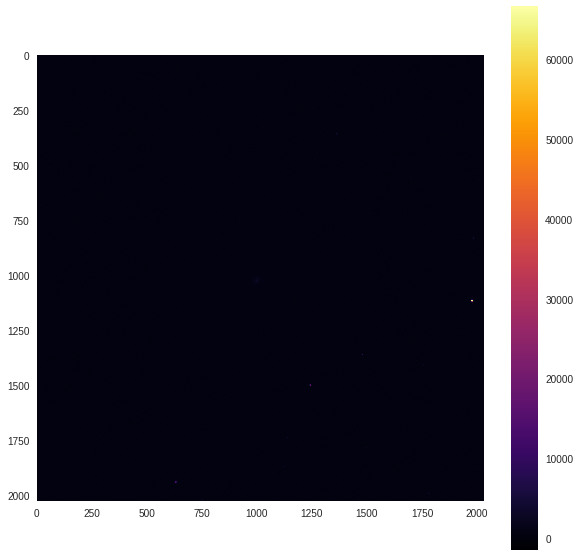

In [40]:
from matplotlib.colors import LogNorm
# Plot de los datos del fit (copiamos y pegamos el código de la actividad 3)
plt.figure(figsize=(10,10))
plt.imshow(imagen, cmap='inferno') #gray, inferno, etc
plt.colorbar()

# El siguiente comando hará que no se vean las líneas sobre la imagen SPOILER: es la galaxia Messier 84
plt.grid(b=None)

Al ver este ploteo, me recuerda un poco a esto :c  
https://en.wikipedia.org/wiki/Pale_Blue_Dot

Se supone que en esta imagen deberíamos ver una galaxia en el centro, sin embargo, casi no se ve nada. Esto ocurre cuando la escala de colores no es la correcta. Para utilizar una escala logarítmica por ejemplo, debes agregar el siguiente argumento a la función imshow(): `norm = LogNorm()`.

Plotea nuevamente el gráfico, pero ahora con la escala logarítmica.

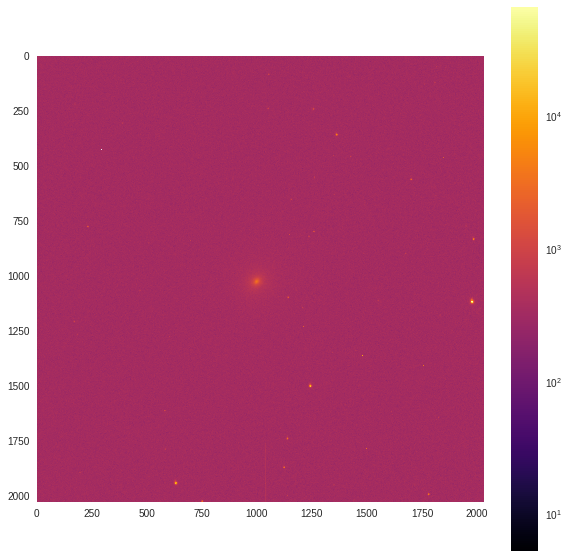

In [41]:
# Ploteo con escala logarítmica de los datos del fit (copiamos y pegamos el código de la actividad 3)
plt.figure(figsize=(10,10))
plt.imshow(imagen, norm = LogNorm(),cmap='inferno') #gray, inferno, etc
plt.colorbar()

# El siguiente comando hará que no se vean las líneas sobre la imagen SPOILER: es la galaxia Messier 84
plt.grid(b=None)

Ahora se observa una pequeña zona más brillante en el centro: es una galaxia! Sin embargo, nos gustaría verla más de cerca. Como la imagen es una matriz de valores, lo que debes hacer a continuación es un slicing de los datos para seleccionar un cuadrado.

**HINT** El slicing en una matriz de hace de la forma `array[inicio_fila:fin_fila,inicio_columna:fin_columna]`. Si necesitan más ayuda, google es su mejor amigo :)

Luego de tener el cuadrado que contiene la imagen, debes plotearla con escala logarítmica de colores.

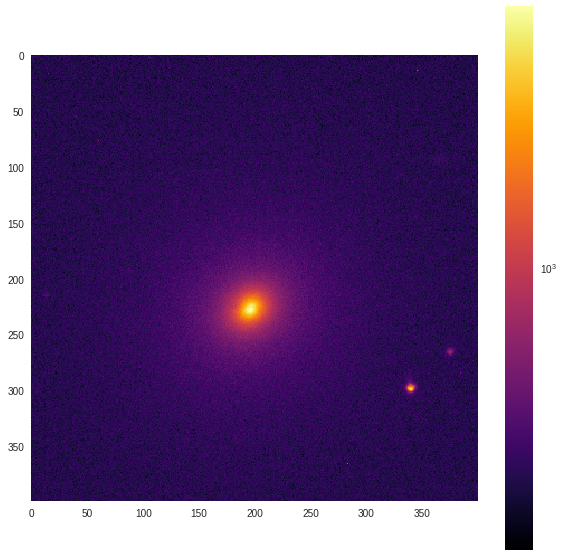

In [42]:
# Slicing del cuadrado con la galaxia y plot acá
# Ploteo con escala logarítmica y con slicing de los datos del fit (copiamos y pegamos el código de la actividad 3)
imagen=imagen[800:1200,800:1200] #notamos en el ploteo anterior, que la galaxia está entre las filas 800 y 1200, y las columnas 800 y 1200
plt.figure(figsize=(10,10))
plt.imshow(imagen, norm = LogNorm(),cmap='inferno') #gray, inferno, etc
plt.colorbar()

# El siguiente comando hará que no se vean las líneas sobre la imagen SPOILER: es la galaxia Messier 84
plt.grid(b=None)

**Nota: Por alguna razón, algunas veces no ploteaba la imagen. No hay mucho que decir de aquí, se puede usar viridis igual.
Buscando en google, resulta ser que es una galaxia muy bonita, la Messier 84**

https://es.wikipedia.org/wiki/Galaxia_lenticular_M84

![Messier 84](https://upload.wikimedia.org/wikipedia/commons/7/7a/Messier_84_nucleus_Hubble.jpg)

##Pandas y bases de datos

##3. Graficando exoplanetas con Pandas

En la Clase 3 aprendimos que la librería `Pandas` es muy útil para trabajar con bases de datos. En esta sección, volveremos a trabajar con la base de datos de Exoplanetas, sacada de NASA Exoplanet Archive, la cual contiene más de 3900 exoplanetas confirmados con sus respectivos parámetros planetarios y estelares.

Para conocer las columnas que contiene esta base de datos, pueden abrir el archivo en sus computadores y analizar las primeras líneas que empiezan con #, o también llamar al método `.columns` de un Data Frame.

**HINT** Las columnas más importantes/útiles del archivo planets.csv con su respectiva descripción y unidades, son:
- pl_hostname:    Host Name
- pl_name:        Planet Name
- pl_discmethod:  Discovery Method
- pl_pnum:        Number of Planets in System
- pl_orbper:      Orbital Period [days]
- pl_orbsmax:     Orbit Semi-Major Axis [AU])
- pl_orbeccen:    Eccentricity
- pl_orbincl:     Inclination [deg]
- pl_bmassj:      Planet Mass or M*sin(i) [Jupiter mass]
- pl_radj:        Planet Radius [Jupiter radii]
- ra_str:         RA [sexagesimal]
- ra:             RA [decimal degrees]
- dec_str:        Dec [sexagesimal]
- dec:            Dec [decimal degrees]
- st_dist:        Distance [pc]
- pl_eqt:         Equilibrium Temperature [K]
- pl_massj:       Planet Mass [Jupiter mass]
- pl_masse:       Planet Mass [Earth mass]
- pl_rade:        Planet Radius [Earth radii]
- pl_disc:        Year of Discovery


En esta sección se pide graficar ***de forma clara***, todos los exoplanetas en Masa vs Período, donde el color represente su método de detección. Sugerimos usar máscaras de array para separar los planetas según su método de detección en distintos Data Frame, para luego graficarlos. Recuerden agregar leyendas en el plot donde se explique que significan los colores.


pl_discmethod
Astrometry                                NaN
Eclipse Timing Variations        3.051698e+03
Imaging                          2.282358e+06
Microlensing                     1.213543e+03
Orbital Brightness Modulation    5.198422e-01
Pulsar Timing                    4.318260e+01
Pulsation Timing Variations      2.333452e+02
Radial Velocity                  1.525793e+03
Transit                          8.535497e+01
Transit Timing Variations        2.857088e+02
Name: pl_orbper, dtype: float64


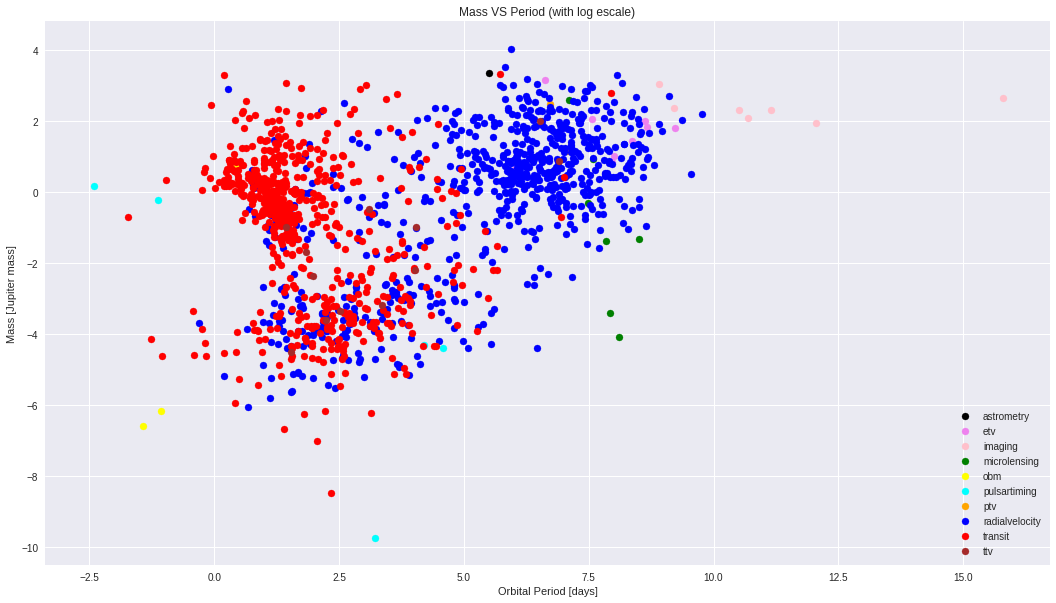

In [48]:
# Importamos Pandas y cargamos el archivo planets.csv
import pandas as pd

archivo = download_file('https://raw.githubusercontent.com/piacortes/astroclases/master/planets.csv?token=AXWBlnRlbOADXAfY-qtBxFJQ3SugzCucks5cpBbnwA%3D%3D',cache=True)
planetas = pd.read_csv(archivo, comment="#")

#abajo agruparemos por técnica de descubrimiento (por orden alfabético) 
#según desv. estándar del periodo orbital
#ya que se relaciona con el eje 'periodo' del gráfico siguiente
#donde notamos que los datos no están tan dispersos de cierta forma,
#ya que en generaal, los puntitos de un mismo color, están agrupados
ordenados=planetas.groupby('pl_discmethod')['pl_orbper'].std() 
print(ordenados)                                              


astrometry=planetas[planetas["pl_discmethod"]=='Astrometry']  #usamos máscaras de array para filtrar por método de detección, lo mismo para las demás de abajo
etv=planetas[planetas["pl_discmethod"]=='Eclipse Timing Variations']
imaging=planetas[planetas["pl_discmethod"]=='Imaging']
microlensing=planetas[planetas["pl_discmethod"]=='Microlensing']
obm=planetas[planetas["pl_discmethod"]=='Orbital Brightness Modulation']
pulsartiming=planetas[planetas["pl_discmethod"]=='Pulsar Timing']
ptv=planetas[planetas["pl_discmethod"]=='Pulsation Timing Variations']
radialvelocity=planetas[planetas["pl_discmethod"]=='Radial Velocity']
transit=planetas[planetas["pl_discmethod"]=='Transit']
ttv=planetas[planetas["pl_discmethod"]=='Transit Timing Variations']

# Graficar plot
plt.figure(figsize=(18,10))

plt.scatter(np.log(astrometry["pl_orbper"]),np.log(astrometry["pl_bmassj"]), color="black",label="astrometry")
plt.scatter(np.log(etv["pl_orbper"]),np.log(etv["pl_bmassj"]), color="violet",label="etv")
plt.scatter(np.log(imaging["pl_orbper"]),np.log(imaging["pl_bmassj"]), color="pink",label="imaging")
plt.scatter(np.log(microlensing["pl_orbper"]),np.log(microlensing["pl_bmassj"]), color="green",label="microlensing")
plt.scatter(np.log(obm["pl_orbper"]),np.log(obm["pl_bmassj"]), color="yellow",label="obm")
plt.scatter(np.log(pulsartiming["pl_orbper"]),np.log(pulsartiming["pl_bmassj"]), color="cyan",label="pulsartiming")
plt.scatter(np.log(ptv["pl_orbper"]),np.log(ptv["pl_bmassj"]), color="orange",label="ptv")
plt.scatter(np.log(radialvelocity["pl_orbper"]),np.log(radialvelocity["pl_bmassj"]), color="blue",label="radialvelocity")
plt.scatter(np.log(transit["pl_orbper"]),np.log(transit["pl_bmassj"]), color="red",label="transit")
plt.scatter(np.log(ttv["pl_orbper"]),np.log(ttv["pl_bmassj"]), color="brown",label="ttv")

plt.title('Mass VS Period (with log escale)')
plt.xlabel("Orbital Period [days]")
plt.ylabel("Mass [Jupiter mass]")
plt.legend(loc = 'lower right')

**Nota: Tuve un problema al poner '.' al plotear con .plot, pero cambié éste por .scatter y sin ese '.' y todo se solucionó. Decidí hacer este gráfico en inglés pues suera raro poner masa joviana xD después de todo, se parece mucho al gráfico que proporciona la NASA :D**

https://exoplanetarchive.ipac.caltech.edu/exoplanetplots/

![Ploteo con  puntitos](https://exoplanetarchive.ipac.caltech.edu/exoplanetplots/exo_massperiod.png)

##4. ¿Cuántos exoplanetas se han descubierto por año?

Realiza un histograma que muestre cuántos exoplanetas se han descubierto por año.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Cantidad')

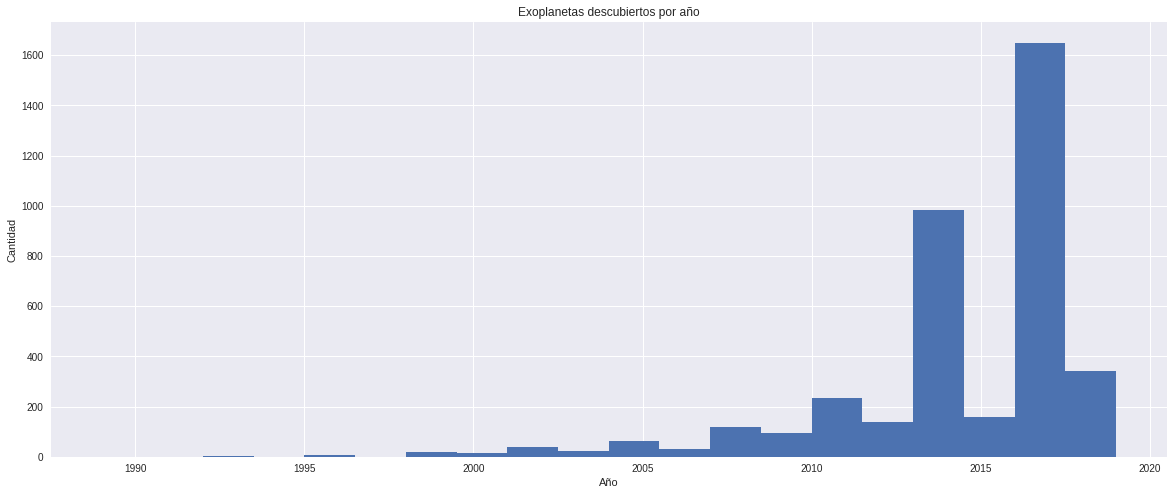

In [44]:
# Hacer histograma
%matplotlib inline
año=planetas["pl_disc"]  

plt.figure(figsize=(20,8))
plt.hist(año,bins=20)
plt.title('Exoplanetas descubiertos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

**Nota: Costó un poco plotear este histograma, pero finalmente aquí está.
Justamente, este gráfico resulta ser muy similar al que proporciona la NASA :D**

https://exoplanetarchive.ipac.caltech.edu/exoplanetplots/ 

![Histogram](https://exoplanetarchive.ipac.caltech.edu/exoplanetplots/exo_dischist.png)

##5. Conocer los planetas más extremos descubiertos

Les pedimos usar sus conocimientos pythonísticos, para printear la información (que ustedes consideren relevante) de los exoplanetas que cumplan con las siguientes características:
- El más lejano a la Tierra.
- El más cercano a la Tierra.
- El más grande.
- El más pequeño.

In [45]:
indice_lejano=planetas["st_dist"].idxmax() #esto retorna el índice del máximo elemento de la columna "st_dist" del data frame planetas
indice_cercano=planetas["st_dist"].idxmin() #se hace lo mismo para el resto, cambiando la columna o por el mínimo
indice_grande=planetas["pl_rade"].idxmax()
indice_pequeño=planetas["pl_rade"].idxmin()

nombre_lejano=planetas["pl_name"][indice_lejano] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
nombre_cercano=planetas["pl_name"][indice_cercano] #en este bloque obtenemos los nombres
nombre_grande=planetas["pl_name"][indice_grande]
nombre_pequeño=planetas["pl_name"][indice_pequeño]

dist_lejano=planetas["st_dist"][indice_lejano]  #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
dist_cercano=planetas["st_dist"][indice_cercano] #en este bloque obtenemos la distancia a la Tierra
dist_grande=planetas["st_dist"][indice_grande]
dist_pequeño=planetas["st_dist"][indice_pequeño]

orbper_lejano=planetas["pl_orbper"][indice_lejano] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
orbper_cercano=planetas["pl_orbper"][indice_cercano] #en este bloque obtenemos los periodos orbitales
orbper_grande=planetas["pl_orbper"][indice_grande]
orbper_pequeño=planetas["pl_orbper"][indice_pequeño]

orbsmax_lejano=planetas["pl_orbsmax"][indice_lejano] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
orbsmax_cercano=planetas["pl_orbsmax"][indice_cercano] #en este bloque obtenemos los semiejes mayores
orbsmax_grande=planetas["pl_orbsmax"][indice_grande]
orbsmax_pequeño=planetas["pl_orbsmax"][indice_pequeño]

masse_lejano=planetas["pl_masse"][indice_lejano] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
masse_cercano=planetas["pl_masse"][indice_cercano] #en este bloque obtenemos las masas
masse_grande=planetas["pl_masse"][indice_grande]
masse_pequeño=planetas["pl_masse"][indice_pequeño]

rade_lejano=planetas["pl_rade"][indice_lejano] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
rade_cercano=planetas["pl_rade"][indice_cercano] #en este bloque obtenemos los radios
rade_grande=planetas["pl_rade"][indice_grande]
rade_pequeño=planetas["pl_rade"][indice_pequeño]




print('Los exoplanetas descubiertos más extremos son los siguientes: ')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
#info sobre el exoplaneta + lejano
print('El exoplaneta más lejano a la Tierra es: ' + str(nombre_lejano))  
print('Su distancia a la Tierra es de: ' +str(dist_lejano)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_lejano)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_lejano)+ ' UA' )
print('Su masa es de: ' +str(masse_lejano)+ ' masas terrestres')
print('Su radio es de: '+str(rade_lejano)+ ' radios terrestres')
print('---------------------------------------------------------')
#info sobre el exoplaneta + cercano
print('El exoplaneta más cercano a la Tierra es: ' + str(nombre_cercano))
print('Su distancia a la Tierra es de: ' +str(dist_cercano)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_cercano)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_cercano)+ ' UA' )
print('Su masa es de: ' +str(masse_cercano)+ ' masas terrestres')
print('Su radio es de: '+str(rade_cercano)+ ' radios terrestres')
print('---------------------------------------------------------')
#info sobre el exoplaneta + grande
print('El exoplaneta más grande es: ' + str(nombre_grande))
print('Su distancia a la Tierra es de: ' +str(dist_grande)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_grande)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_grande)+ ' UA' )
print('Su masa es de: ' +str(masse_grande)+ ' masas terrestres')
print('Su radio es de: '+str(rade_grande)+ ' radios terrestres')
print('---------------------------------------------------------')
#info sobre el exoplaneta + pequeño
print('El exoplaneta más pequeño es: ' + str(nombre_pequeño))
print('Su distancia a la Tierra es de: ' +str(dist_pequeño)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_pequeño)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_pequeño)+ ' UA' )
print('Su masa es de: ' +str(masse_pequeño)+ ' masas terrestres')
print('Su radio es de: '+str(rade_pequeño)+ ' radios terrestres')

Los exoplanetas descubiertos más extremos son los siguientes: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
El exoplaneta más lejano a la Tierra es: SWEEPS-11 b
Su distancia a la Tierra es de: 8500.0 [pc]
Su periodo orbital es de: 1.796 días terrestres
Su semieje mayor es de: 0.03 UA
Su masa es de: 3082.82 masas terrestres
Su radio es de: 12.665999999999999 radios terrestres
---------------------------------------------------------
El exoplaneta más cercano a la Tierra es: Proxima Cen b
Su distancia a la Tierra es de: 1.29 [pc]
Su periodo orbital es de: 11.186 días terrestres
Su semieje mayor es de: 0.0485 UA
Su masa es de: nan masas terrestres
Su radio es de: nan radios terrestres
---------------------------------------------------------
El exoplaneta más grande es: HD 100546 b
Su distancia a la Tierra es de: 97.0 [pc]
Su periodo orbital es de: nan días terrestres
Su semieje mayor es de: 53.0 UA
Su masa es de: nan masas terrestres
Su radio es de: 77.342 radios terrestres

**Nota: para esta parte me fue muy útil usar idxmax e idxmin, que sirven para obtener el índice del máximo o mínimo elemento de una serie (también hay un símil para data frame) aquí hay más info sobre estas funciones:**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html#pandas.Series.idxmax 

##6. Los 5 exoplanetas más parecidos a la Tierra

Ahora, deben ponerse creativos para contarnos cuáles son los 5 exoplanetas descubiertos más parecidos a la Tierra, y sus características. 

**Importante:** Queda a su criterio (o descriterio) como definirán la similitud a la Tierra.

In [46]:
#Nos interesan los exoplanetas cuyo período orbital sea cercano a 365 días, 
#un semieje mayor cercano a 1 UA, con masas y radios cercanos al terrestre (1 masa y 1 radio terrestre) y excentricidad orbital más similar
#pese a esto, hay muchas otras variables en juego como lo son; el T eff de su estrella, 
#la aceleración de gravedad del planeta (que se puede calcular), posibilidad de existencia 
#de agua en sus 3 estados, ect.

orbper=pd.Series.abs(planetas["pl_orbper"]-365)
orbsmax=pd.Series.abs(planetas["pl_orbsmax"]-1)
masse=pd.Series.abs(planetas["pl_masse"]-1)
rade=pd.Series.abs(planetas["pl_rade"]-1)
orbeccen=pd.Series.abs(planetas["pl_orbeccen"]-0.0167)

ind_cand_orbper=orbper.idxmin()     #indice del candidato + similar a la Tierra, según periodo orbital
ind_cand_orbsmax=orbsmax.idxmin()   #indice del candidato + similar a la Tierra, según semieje mayor
ind_cand_masse=masse.idxmin()       #indice del candidato + similar a la Tierra, según masa del planeta, en masa terrestre
ind_cand_rade=rade.idxmin()         #indice del candidato + similar a la Tierra, según periodo orbital, en radio terrestre
ind_cand_orbeccen=orbeccen.idxmin() #indice del candidato + similar a la Tierra, según periodo orbital, según excentricidad

cand_orbper=planetas["pl_name"][ind_cand_orbper] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
cand_orbsmax=planetas["pl_name"][ind_cand_orbsmax] #en este bloque obtenemos los nombres de los candidatos
cand_masse=planetas["pl_name"][ind_cand_masse]
cand_rade=planetas["pl_name"][ind_cand_rade]
cand_orbeccen=planetas["pl_name"][ind_cand_orbeccen]

dist_cand_orbper=planetas["st_dist"][ind_cand_orbper] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
dist_cand_orbsmax=planetas["st_dist"][ind_cand_orbsmax] #en este bloque obtenemos los periodos orbitales de los candidatos
dist_cand_masse=planetas["st_dist"][ind_cand_masse]
dist_cand_rade=planetas["st_dist"][ind_cand_rade]
dist_cand_orbeccen=planetas["st_dist"][ind_cand_orbeccen]

orbper_cand_orbper=planetas["pl_orbper"][ind_cand_orbper] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
orbper_cand_orbsmax=planetas["pl_orbper"][ind_cand_orbsmax] #en este bloque obtenemos los periodos orbitales de los candidatos
orbper_cand_masse=planetas["pl_orbper"][ind_cand_masse]
orbper_cand_rade=planetas["pl_orbper"][ind_cand_rade]
orbper_cand_orbeccen=planetas["pl_orbper"][ind_cand_orbeccen]

orbsmax_cand_orbper=planetas["pl_orbsmax"][ind_cand_orbper] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
orbsmax_cand_orbsmax=planetas["pl_orbsmax"][ind_cand_orbsmax] #en este bloque obtenemos los semiejes mayores de los candidatos
orbsmax_cand_masse=planetas["pl_orbsmax"][ind_cand_masse]
orbsmax_cand_rade=planetas["pl_orbsmax"][ind_cand_rade]
orbsmax_cand_orbeccen=planetas["pl_orbsmax"][ind_cand_orbeccen]

masse_cand_orbper=planetas["pl_masse"][ind_cand_orbper] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
masse_cand_orbsmax=planetas["pl_masse"][ind_cand_orbsmax] #en este bloque obtenemos las masas de los candidatos
masse_cand_masse=planetas["pl_masse"][ind_cand_masse]
masse_cand_rade=planetas["pl_masse"][ind_cand_rade]
masse_cand_orbeccen=planetas["pl_masse"][ind_cand_orbeccen]

rade_cand_orbper=planetas["pl_rade"][ind_cand_orbper] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
rade_cand_orbsmax=planetas["pl_rade"][ind_cand_orbsmax] #en este bloque obtenemos los radios de los candidatos
rade_cand_masse=planetas["pl_rade"][ind_cand_masse]
rade_cand_rade=planetas["pl_rade"][ind_cand_rade]
rade_cand_orbeccen=planetas["pl_rade"][ind_cand_orbeccen]

orbeccen_cand_orbper=planetas["pl_orbeccen"][ind_cand_orbper] #usamos propiedades del data frame, para ubicar el nombre del planeta, según la fila y la columna
orbeccen_cand_orbsmax=planetas["pl_orbeccen"][ind_cand_orbsmax] #en este bloque obtenemos las excentricidades de los candidatos
orbeccen_cand_masse=planetas["pl_orbeccen"][ind_cand_masse]
orbeccen_cand_rade=planetas["pl_orbeccen"][ind_cand_rade]
orbeccen_cand_orbeccen=planetas["pl_orbeccen"][ind_cand_orbeccen]



print('Los 5 exoplanetas más similares a la Tierra son los siguientes:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('1.- El exoplaneta con periodo orbital más similar a la Tierra es: ' + str(cand_orbper))
print('Su distancia a la Tierra es de: ' +str(dist_cand_orbper)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_cand_orbper)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_cand_orbper)+ ' UA' )
print('Su masa es de: ' +str(masse_cand_orbper)+ ' masas terrestres')
print('Su radio es de: '+str(rade_cand_orbper)+ ' radios terrestres')
print('Su excentricidad es de: '+str(orbeccen_cand_orbper))
print('---------------------------------------------------------')

print('2.- El exoplaneta con el semieje mayor más similar a la Tierra es: ' + str(cand_orbsmax))
print('Su distancia a la Tierra es de: ' +str(dist_cand_orbsmax)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_cand_orbsmax)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_cand_orbsmax)+ ' UA' )
print('Su masa es de: ' +str(masse_cand_orbsmax)+ ' masas terrestres')
print('Su radio es de: '+str(rade_cand_orbsmax)+ ' radios terrestres')
print('Su excentricidad es de: '+str(orbeccen_cand_orbsmax))
print('---------------------------------------------------------')

print('3.- El exoplaneta con masa terrestre más similar a la Tierra es: ' + str(cand_masse))
print('Su distancia a la Tierra es de: ' +str(dist_cand_masse)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_cand_masse)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_cand_masse)+ ' UA' )
print('Su masa es de: ' +str(masse_cand_masse)+ ' masas terrestres')
print('Su radio es de: '+str(rade_cand_masse)+ ' radios terrestres')
print('Su excentricidad es de: '+str(orbeccen_cand_masse))
print('---------------------------------------------------------')

print('4.- El exoplaneta con radio terrestre más similar a la Tierra es: ' + str(cand_rade))
print('Su distancia a la Tierra es de: ' +str(dist_cand_rade)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_cand_rade)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_cand_rade)+ ' UA' )
print('Su masa es de: ' +str(masse_cand_rade)+ ' masas terrestres')
print('Su radio es de: '+str(rade_cand_rade)+ ' radios terrestres')
print('Su excentricidad es de: '+str(orbeccen_cand_rade))
print('---------------------------------------------------------')

print('5.- El exoplaneta con la excentricidad más similar a la Tierra es: ' + str(cand_orbeccen))
print('Su distancia a la Tierra es de: ' +str(dist_cand_orbeccen)+ ' [pc]')
print('Su periodo orbital es de: '+ str(orbper_cand_orbeccen)+ ' días terrestres')
print('Su semieje mayor es de: '+str(orbsmax_cand_orbeccen)+ ' UA' )
print('Su masa es de: ' +str(masse_cand_orbeccen)+ ' masas terrestres')
print('Su radio es de: '+str(rade_cand_orbeccen)+ ' radios terrestres')
print('Su excentricidad es de: '+str(orbeccen_cand_orbeccen))

Los 5 exoplanetas más similares a la Tierra son los siguientes:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1.- El exoplaneta con periodo orbital más similar a la Tierra es: Kepler-1536 b
Su distancia a la Tierra es de: 401.0 [pc]
Su periodo orbital es de: 364.758031 días terrestres
Su semieje mayor es de: nan UA
Su masa es de: nan masas terrestres
Su radio es de: 3.14 radios terrestres
Su excentricidad es de: nan
---------------------------------------------------------
2.- El exoplaneta con el semieje mayor más similar a la Tierra es: BD+48 738 b
Su distancia a la Tierra es de: 892.17 [pc]
Su periodo orbital es de: 392.6 días terrestres
Su semieje mayor es de: 1.0 UA
Su masa es de: nan masas terrestres
Su radio es de: nan radios terrestres
Su excentricidad es de: 0.2
---------------------------------------------------------
3.- El exoplaneta con masa terrestre más similar a la Tierra es: TRAPPIST-1 b
Su distancia a la Tierra es de: 12.1 [pc]
Su periodo orbital es de: 1